Imports

Step 7

In [162]:
##imports##
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math


Reading the Data

In [149]:
##read data##

#step 8#
file_path_layout = "##please input the file path or the file name##"
file_path_data = "##please input the file path or the file name##"

##if file .txt and not .csv then include an r before the ""parentheses""
##thus it will be 
##file_path_data = r"##please input the file path or the file name##"


df_plate_reader_layout = pd.read_csv(file_path_layout)
df_plate_reader_data = pd.read_csv(file_path_data)

Functions

Step 10

In [37]:
## Is Nan function

def isNaN(num):
    return num != num

In [78]:
##function that finds the number of groups in the layout
def unique_samples_from_plate_layout(df):
    df = df.iloc[:, 1:].reset_index(drop=True)
    samples = set()

    for i in range(df.shape[0] - 1):
        for j in range(df.shape[1] - 1):
            unique_sample = df.iloc[i, j]

            if pd.isna(unique_sample):
                continue

            samples.add(unique_sample)

    return list(samples)

In [103]:
##finding values in the data that are mapped to the same layout position
def find_values(string, layout, data_frame):
    layout = layout.iloc[:, 1:]
    data_frame = data_frame.iloc[:, 1:]
    values = []

    for ii in range(layout.shape[0]):
        for jj in range(layout.shape[1]):
            if layout.iloc[ii, jj] == string:
                values.append(data_frame.iloc[ii, jj])

    return values

In [159]:
##Function that enumerates through the groups of the layout
##Extracts the data in the corresponding plate map
##placing this information into the correct column
def developing_new_df_from_input_data(layout, data_plate_reader):
    column_titles = unique_samples_from_plate_layout(layout)
    num_rows = layout.shape[0]
    num_cols = layout.shape[1]

    df = pd.DataFrame(index=range(num_rows), columns=column_titles)

    for ii, title in enumerate(column_titles):
        cell_position = 0

        for jj in range(num_rows):
            for kk in range(num_cols):
                if layout.iloc[jj, kk] == title:
                    df.iloc[cell_position, ii] = data_plate_reader.iloc[jj, kk]
                    cell_position += 1

    return df

In [ ]:
##A function to obtain the original density after a dilution
def get_OD(ratio, final_volume, cell_position):
    ratio_nums = ratio.split(':')
    multiplyer = int (int(ratio_nums[1]) / int(ratio_nums[0]) )
    a = multiplyer*final_volume*cell_position
    return a

In [172]:
##Function to calculate the original density and put it into the dataframe
def calculate_the_original_density(df, columns_names_ajusted, diluted_to, final_volume):
    for ii in range(len(columns_names_ajusted)):

        name = columns_names_ajusted[ii]

        df[str(name)] = get_OD(str(diluted_to[ii]), float(final_volume), df[str(name)])
        
    return df

In [2]:
def finding_statistically_significant_groups_update(list_of_columns, p_value, dataframe_df, scaling_factor):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import itertools
    import scipy.stats as stats

    # Set up the plot
    sns.set(style='whitegrid')
    fig, axes = plt.subplots(1, 1, figsize=(12, 6), dpi=600)
    new_df = dataframe_df[list_of_columns]

    # Plot the data
    sns.boxplot(data=new_df, ax=axes)

    boxplot_height = axes.get_ylim()[1]  # Get the maximum height of the box plots

    line_offset = scaling_factor  # Adjust this value to control the spacing between the lines

    for i in range(len(list_of_columns)):
        for j in range(i+1, len(list_of_columns)):
            t_stat, p_val = stats.ttest_ind(new_df.iloc[:, i], new_df.iloc[:, j])

            if p_val <= p_value:
                x_pos = (i + j) / 2
                y_pos = boxplot_height + line_offset  # Adjust the y-coordinate to be above the previous lines

                plt.text(x_pos, y_pos, f"p={p_val:.2e}", ha='center', va='bottom', fontsize=8)

                plt.plot([i, j], [y_pos, y_pos], 'k--')

                line_offset += scaling_factor  # Increase the line offset for the next line

    return fig

End of Functions

Calling/Running functions

Step 11

In [ ]:
df = developing_new_df_from_input_data(df_plate_reader_layout, df_plate_reader_data)

Step 12

In [ ]:
print(df)

Dilutions Steps 13-18

In [ ]:
columns_need_to_be_adjusted = ['##change name to group name##', '##change name to group name##']
diluted_from_original_density = ['##change to correct dilution##', '##change to correct dilution##']
final_volume_in_ml = ##change to correct final volume amount##

In [ ]:
df = calculate_the_original_density(df,columns_need_to_be_adjusted, diluted_from_original_density, final_volume_in_ml)

Graphing the Data Steps 19-27

/Users/zach/Documents/Education/Undergrad (UWEC)/Summer 2023/UCLA/.venv/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/zach/Documents/Education/Undergrad (UWEC)/Summer 2023/UCLA/.venv/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


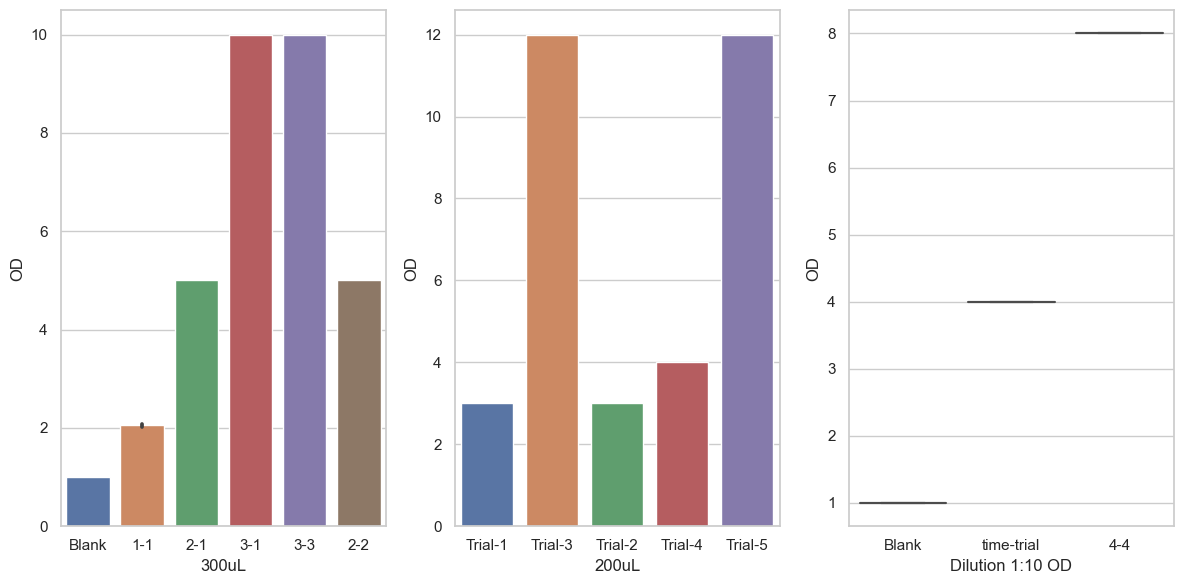

In [169]:
##Graphing the data

#set up the style, personally I am a fan of 'whitegrid'
sns.set(style='##choose your style##')

#setting up the figure, axes, and figure size
fig, axes = plt.subplots(1, 3, figsize=(12, 6), dpi = 600)

#Choosing the graphs and the x-axis groupins
graph1 = ['##group 1##', '##group 2##', '##group 3##', '##group 4##',
           '##group 5##', '##group 6##', '##group 7##', '##group 8##']
graph2 = ['##group 1##', '##group 2##', '##group 3##', '##group 4##',
           '##group 5##', '##group 6##', '##group 7##', '##group 8##']
graph3 = ['##group 1##', '##group 2##', '##group 3##', '##group 4##',
           '##group 5##', '##group 6##', '##group 7##', '##group 8##']

#plotting the data
sns.barplot(data=df[graph1], ax=axes[0])
sns.lineplot(data=df[graph2], ax=axes[1])
sns.boxplot(data=df[graph3], ax=axes[2])

#choosing the labels and titles
axes[0].set_xlabel('##set x label##')
axes[0].set_ylabel('##set y label##')
axes[0].set_title('## set title##')


axes[1].set_xlabel('##set x label##')
axes[1].set_ylabel('##set y label##')
axes[1].set_title('## set title##')


axes[2].set_xlabel('##set x label##')
axes[2].set_ylabel('##set y label##')
axes[2].set_title('## set title##')

#figure supertitle
fig.suptitle('##set figure super title##', fontsize=16)

#ploting the graphs
plt.tight_layout()
 
##saving the data and graphs

##plt.savefig('##please put the name that you want##.png' )

#showing us the data
plt.show()


In [ ]:
fig, axes = finding_statistically_significant_groups_update(##list of groups##, ##pvalue##, df, scaling_factor)
axes.set_ylabel(##choose you y label)
axes.set_title(##choose you title)

##plt.savefig('##save file to name you want##.png')